In [0]:
from sklearn.datasets import fetch_covtype
import numpy as np 
import pandas as pd 
from sklearn.utils import shuffle
from sklearn.utils import resample
import matplotlib.pyplot as plt

import seaborn as sns



In [0]:
nom_column = ["Altitude","Orientation","Pente","Distance_he","Distance_ve","Distance_hr","Ombrage_9","Ombrage_12","Ombrage_15","Distance_hf"]
j = [4,40]
for i in j :
	if(i == 4):
		for x in range(4):
			nom_column.append("Wilderness")
	if(i == 40):
		for x in range(40):
			nom_column.append("Type_sol")

In [3]:
#upload data
dataset  = fetch_covtype()

data = pd.DataFrame(dataset.data,columns = nom_column)
data["Classe"]= dataset.target

print("Data download")

Data download


In [4]:
size_tableau = [33,38,8,2,5,8,6]

taille = len(data)//1000

#size_tableau = [100//7 for i in range(7) ] # décommenter pour avoir nos test avec classes équilibrées

print(str(sum(size_tableau)/10.0) + " % des données de base uilisées")
dataset = shuffle(data, n_samples=0)
for i, size in enumerate(size_tableau):
      if len(data[data.Classe==int(i+1)]) >= size*taille : 
        dataset = dataset.append(shuffle(data[data.Classe==int(i+1)], n_samples=size*taille, random_state=12))
      else :
        dataset = dataset.append(resample(data[data.Classe==int(i+1)], 
                                 replace=True,    
                                 n_samples=size*taille,  
                                 random_state=123))  

10.0 % des données de base uilisées


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


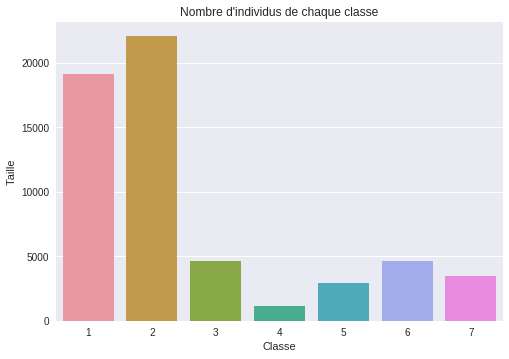

In [5]:
dataset = dataset.reset_index()

classe_dataset = dataset["Classe"].value_counts()

barplot=sns.barplot(classe_dataset.index,classe_dataset.values.tolist())#,palette="rocket")
barplot.set_xlabel("Classe")
barplot.set_ylabel("Taille")
barplot.set_title("Nombre d'individus de chaque classe")
plt.show()

In [6]:
variables = dataset.columns
tmp = len(variables)-1
data_train = dataset[variables[1:]]
data_train = shuffle(data_train, random_state=123)
X_train = data_train.iloc[:,1:tmp]
x_train = X_train.values
y_train = data_train.Classe
print(tmp)

55


In [0]:
from sklearn.neighbors import KNeighborsClassifier
#try 5
modelKNN = KNeighborsClassifier(n_neighbors=3)
modelKNN = modelKNN.fit(x_train,y_train)


In [0]:
from sklearn import tree
modelTree = tree.DecisionTreeClassifier(random_state=17)
modelTree = modelTree.fit(x_train, y_train)

In [0]:
data_test = data[variables[1:]]
data_test = shuffle(data_test, n_samples=20000, random_state=17)
X_test = data_test.iloc[:,1:tmp]
x_test = X_test.values
y_test = data_test.Classe

In [10]:
print("KNN Accuracy: %0.2f" % (modelKNN.score(x_test,y_test)), end="    ")
print("Tree Accuracy: %0.2f" % (modelTree.score(x_test,y_test)))

for i in range(1,8):
  data_classe_i = data[data.Classe==int(i)]

  data_classe_i = shuffle(data_classe_i, n_samples=2000, random_state=17)
  data_classe_i = data_classe_i[variables[1:]]
  X_test_i = data_classe_i.iloc[:,1:tmp]
  x_test_i = X_test_i.values
  y_test_i = data_classe_i.Classe
  print("Classe %d KNN Accuracy: %0.2f" % (i, modelKNN.score(x_test_i,y_test_i)), end="    ")
  print("Classe %d Tree Accuracy: %0.2f" % (i, modelTree.score(x_test_i,y_test_i)))

KNN Accuracy: 0.76    Tree Accuracy: 0.81
Classe 1 KNN Accuracy: 0.78    Classe 1 Tree Accuracy: 0.79
Classe 2 KNN Accuracy: 0.75    Classe 2 Tree Accuracy: 0.80
Classe 3 KNN Accuracy: 0.67    Classe 3 Tree Accuracy: 0.81
Classe 4 KNN Accuracy: 0.76    Classe 4 Tree Accuracy: 0.90
Classe 5 KNN Accuracy: 0.86    Classe 5 Tree Accuracy: 0.83
Classe 6 KNN Accuracy: 0.78    Classe 6 Tree Accuracy: 0.86
Classe 7 KNN Accuracy: 0.83    Classe 7 Tree Accuracy: 0.83


In [0]:
tree.export_graphviz(modelTree, out_file='tree.dot', max_depth=2)   
from google.colab import files
from os import system
system("dot -Tpng tree.dot -o tree.png")
files.download('tree.png')

In [12]:
variables[3]

'Pente'